In [2]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [3]:
# Column 1: age in years
# Column 2: 1 = male, 0 = female
# Column 3: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
# Column 4: resting blood pressure in mmHg
# Column 5: in mg/dl
# Column 6: 1 means > 120 mg/dl, 0 means <= 120 mg/dl
# Column 7: resting electrocardiographic, 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
# Column 8: max heart rate achieved
# Column 9: 1 = yes, 2 = no
# Column 10: ST depression induced by exercise relative to rest
# Column 11: slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping
# Column 12: number of major vessels (0-3) colored by flourosopy
# Column 13: 3 = normal, 6 = fixed defect, 7 = reversable defect
# Column 14: >=1 means heart disease, 0 = no heart disease

myNames = ["age", # column 1
        "sex", # col 2
        "chestPainType", # col 3
        "restingBP", # col 4
        "serumCholesterol", # col 5
        "fastingBloodSugar", # col 6
        "restingEcg", # col 7
        "maxHeartRate", # col 8
        "exerciseInducedAngina", # col 9
        "stDepression", # col 10
        "stSlope", # col 11
        "majorVessels", # col 12
        "thalassemia", # col 13
        "diagnosis"] # col 14
assert len(myNames) == 14
data=pd.read_csv("data/processed.cleveland.data", sep=',', names=myNames, na_values=["?", '?'])
data = data.dropna() # Drop rows with missing data

# Convert all columns to float
for name in myNames:
    data[name] = pd.to_numeric(data[name],errors = 'coerce')

X = data.values[:, :-1]
y = data.values[:, -1:]
y = np.clip(y, a_min=0, a_max=1) # Clip values in the array to be between 0 and 1, both inclusive

m = data.shape[0] # num examples
n = data.shape[1] - 1 # num features

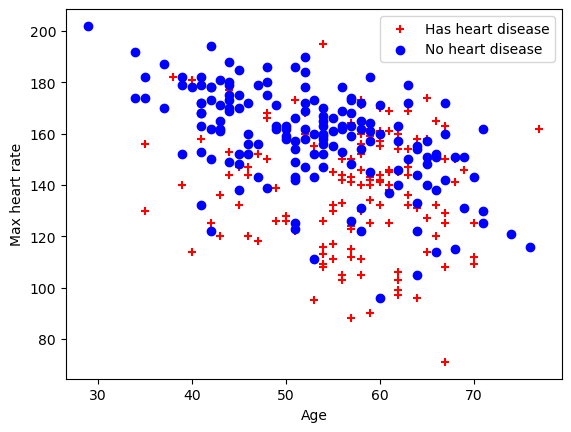

In [4]:
pos=(y==1)
neg=(y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],7],c="r",marker="+", label = "Has heart disease")
plt.scatter(X[neg[:,0],0],X[neg[:,0],7],c="b",marker="o", label = "No heart disease")

plt.xlabel("Age")
plt.ylabel("Max heart rate")
#plt.ylim(,200)
plt.legend()
plt.show()

In [5]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return polynomial terms up to the given degree
    """
    out = np.ones((len(x1),1))
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out


In [6]:
degree=6  #better results than with degree=6
Xmap = mapFeature(X[:,0], X[:,7],degree)


In [7]:
# Complete sigmoid function. The same function as in Part 1
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    gz= 1/(1 + np.exp(-z))
    
    return gz

def costFunctionReg(X, y, theta, Lambda):
    """
    Take in numpy array of  data X, labels y and theta, to return the regularized cost function and gradients
    of the logistic regression classifier
    """
    
    #number of training examples 
    m=len(y)
        
    #vector of the model predictions for all training examples      
    h = sigmoid(np.dot(X, theta))
    
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
    
    #cost function without regularization term
    cost = sum(error)/m
    
    #add regularization term to the cost function L2 norm
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    #gradient of theta_0
    grad_0= (1/m) * np.dot(X.transpose(),(h - y))[0]
    
    #vector of gradients of theta_j from j=1:n (adding the regularization term of the gradient)
    grad = (1/m) * np.dot(X.transpose(),(h - y))[1:] + (Lambda/m)* theta[1:]
       
    # all gradients in a column vector shape
    grad_all=np.append(grad_0,grad)
    grad_all = grad_all.reshape((len(grad_all), 1))
    
    return regCost[0], grad_all

In [8]:
# Initialize fitting parameters
n_size = (data.shape[1], 1)
initial_theta = np.zeros(n_size)

# Set regularization parameter lambda to 0
Lambda = 0

X_app= np.append(np.ones((X.shape[0], 1)), X, axis=1)

#Call CostFunctionReg and get the cost and gradients for initial_theta
cost, grad= costFunctionReg(X_app, y, initial_theta, Lambda)

print("Cost for initial theta is",round(cost,3) )  #ANSWER: Cost for initial theta is 0.693


Cost for initial theta is 0.693


In [9]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    J_history =[]
    
    for i in range(num_iters):
        
        #call CostFunctionReg 
        cost, grad = costFunctionReg(X, y, theta, Lambda)
        
        #update theta
        theta = theta - alpha * grad
        
        J_history.append(cost)
    
    return theta , J_history


/tmp/ipykernel_6934/1943728979.py:7: RuntimeWarning: overflow encountered in exp
  gz= 1/(1 + np.exp(-z))
/tmp/ipykernel_6934/1943728979.py:23: RuntimeWarning: divide by zero encountered in log
  error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
/tmp/ipykernel_6934/1943728979.py:23: RuntimeWarning: invalid value encountered in multiply
  error = (-y * np.log(h)) - ((1-y)*np.log(1-h))


Text(0.5, 1.0, 'Cost function using Gradient Descent')

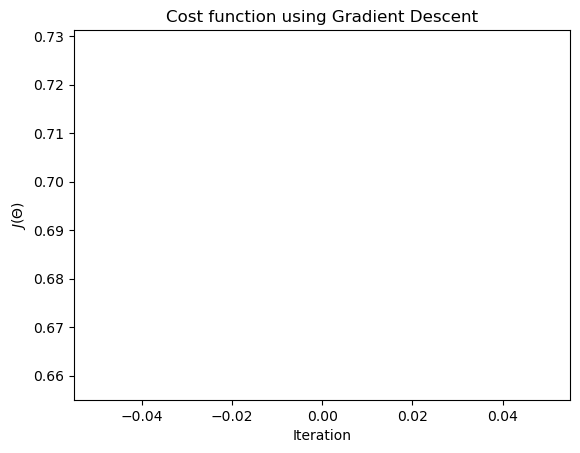

In [11]:
Lambda = 0
alpha= 0.5
iterat= 100
initial_theta = np.zeros((Xmap.shape[1], 1))
theta , J_history = gradientDescent(Xmap,y,initial_theta,alpha,iterat,Lambda)

plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")